In [194]:
import numpy as np
import newt.glib as glb
import newt.glibShapes as gshp
import newt.pg2Multi as p2m
import matplotlib.pyplot as plt

#constants used

DENSITY = 2700 #aluminum density
N = 400
INNER_RAD = .0475 #can change to make thicker & easier to machine
OUTER_RAD = .05 #5cm is roughly 2in
THICK = OUTER_RAD-INNER_RAD
HEIGHT = .152 #roughly 6in
BEAM_THICK = np.pi/10 #really beam half angle
M_FACTOR = 1 #ignore for now
MASS_SHIFTED_CIRCLE = (DENSITY*THICK*np.pi*(OUTER_RAD-INNER_RAD)**2)/2
MASS_BEAM = (DENSITY*BEAM_THICK/2*HEIGHT*(OUTER_RAD-INNER_RAD)**2)
#MASS_LEFTOVER = int((1-M_FACTOR)*TOTAL_MASS) #ignore for now

In [195]:
#both rotates and translates a mass object, can use either-or or both

def rotate_trans(mass_object, rotation, translation):
    return glb.translate_point_array(glb.rotate_point_array(mass_object, rotation, [0, 0, 1]), translation)

(-0.17, 0.17)

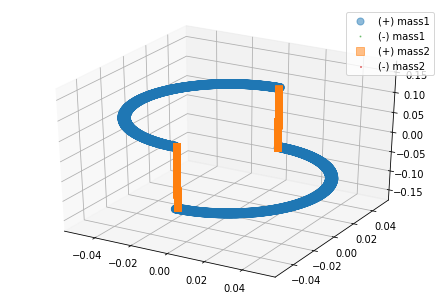

In [196]:
#trying to create shape from autocad

#wedge(mass, r1, r2, thickness, half angle, nxy, nz)
#combines two semicircles into one mass object, semicircles at +- OUTER_RAD/2
wedge = gshp.wedge(MASS_SHIFTED_CIRCLE, INNER_RAD, OUTER_RAD, THICK, np.pi/2, N, 1)
wedge1shifted = glb.translate_point_array(wedge, [0, 0, -HEIGHT/2])
wedge2shifted = rotate_trans(wedge, np.pi, [0, 0, HEIGHT/2])
wedgescombined = np.concatenate([wedge1shifted, wedge2shifted])

#combines two edges connecting semicircles into one mass object
beam = gshp.wedge(MASS_BEAM, INNER_RAD, OUTER_RAD, HEIGHT, BEAM_THICK, 1, N)
beam1shifted = rotate_trans(beam, np.pi/2, [0, 0, 0])
beam2shifted = rotate_trans(beam, 3*np.pi/2, [0, 0, 0])
beamscombined = np.concatenate([beam1shifted, beam2shifted])

fig, ax = glb.display_points(wedgescombined, beamscombined)
ax.set_zlim([-.17, .17])

In [199]:
#calculating moments

totalmass = np.concatenate([wedgescombined, beamscombined])
print(p2m.qmoment(2, 0, totalmass), "20 moment")
print(p2m.qmoment(2, 1, totalmass), "21 moment")
print(p2m.qmoment(2, 2, totalmass), "22 moment")

#print(p2m.qmoments(2, totalmass)[2])
#print(p2m.Qmomentb(2, 1, totalmass))
#print(p2m.qmoments(2, totalmass))

(7.865621838882963e-07+0j) 20 moment
(2.4178119094901144e-07+1.5881867761018131e-22j) 21 moment
(-7.047335467468164e-07-1.763242276871706e-23j) 22 moment


In [6]:
#varying parameters to find optimal moment

ran = 100

def make_small(l, mag = 1):
    return [l/(i+mag) for i in range(ran)]
def make_large(l, mag = 1):
    return [l*(i+mag) for i in range(ran)]
def incl(l, mag = 1):
    return [l*(1+mag*(i-ran/2)) for i in range(ran)]

#can probably ignore these, variation is quite large

HEIGHTSMALL = make_small(HEIGHT)#lowers Q21
HEIGHTLARGE = make_large(HEIGHT)#raises Q21
INNERRADSMALL = make_small(INNER_RAD)
INNERRADLARGE = make_large(INNER_RAD)
OUTERRADSMALL = make_small(OUTER_RAD)
OUTERRADLARGE = make_large(OUTER_RAD)
CIRCLESMALL = [DENSITY*(OUTERRADSMALL[i]-INNERRADSMALL[i])*np.pi*(OUTERRADSMALL[i]-OUTERRADSMALL[i])**2 for i in range(len(OUTERRADSMALL))]
BEAMSMALL = [DENSITY*BEAM_THICK/2*HEIGHTSMALL[i]*(OUTERRADSMALL[i]-INNERRADSMALL[i])**2 for i in range(len(OUTERRADSMALL))]
CIRCLELARGE = [DENSITY*(OUTERRADLARGE[i]-INNERRADLARGE[i])*np.pi*(OUTERRADLARGE[i]-INNERRADLARGE[i])**2 for i in range(len(OUTERRADSMALL))]
BEAMLARGE = [DENSITY*BEAM_THICK/2*HEIGHTLARGE[i]*(OUTERRADLARGE[i]-INNERRADLARGE[i])**2 for i in range(len(OUTERRADSMALL))]

#small variations (inc = increment)

HEIGHTINC = incl(HEIGHT, .01)
BEAMINC = [(DENSITY*BEAM_THICK/2*i*(OUTER_RAD-INNER_RAD)**2)/2 for i in HEIGHTINC]
OUTERRADINC = incl(OUTER_RAD, .001)
INNERRADINC = incl(INNER_RAD, .001)
THICKINC = [OUTERRADINC[i] - INNERRADINC[i] for i in range(len(OUTERRADINC))]
CIRCLEINC = [(DENSITY*THICKINC[i]*np.pi*(OUTERRADINC[i]-INNERRADINC[i])**2)/2 for i in range(len(OUTERRADINC))]

In [ ]:
#mostly ineffective for actually computing moments as the heights either increase or decrease greatly

#decreasing height on a large scale
for i in HEIGHTSMALL:
    #wedge(mass, r1, r2, thickness, half angle, nxy, nz)
    #combines two semicircles into one mass object, semicircles at +- OUTER_RAD/2
    wedge = gshp.wedge(MASS_SHIFTED_CIRCLE, INNER_RAD, OUTER_RAD, THICK, np.pi/2, N, 1)
    wedge1shifted = glb.translate_point_array(wedge, [0, 0, -i/2])
    wedge2shifted = rotate_trans(wedge, np.pi, [0, 0, i/2])
    wedgescombined = np.concatenate([wedge1shifted, wedge2shifted])

    #combines two edges connecting semicircles into one mass object
    beam = gshp.wedge(MASS_BEAM, INNER_RAD, OUTER_RAD, i, BEAM_THICK, 1, N)
    beam1shifted = rotate_trans(beam, np.pi/2, [0, 0, 0])
    beam2shifted = rotate_trans(beam, 3*np.pi/2, [0, 0, 0])
    beamscombined = np.concatenate([beam1shifted, beam2shifted])

    fig, ax = glb.display_points(wedgescombined, beamscombined)
    ax.set_zlim([-.05, .05])

    #calculating moments
    totalmass = np.concatenate([wedgescombined, beamscombined])
    print(p2m.qmoment(2, 1, totalmass), i)

In [ ]:
#looking at height inc

moments = []
for i in range(len(HEIGHTINC)):
    #wedge(mass, r1, r2, thickness, half angle, nxy, nz)
    #combines two semicircles into one mass object, semicircles at +- OUTER_RAD/2
    wedge = gshp.wedge(MASS_SHIFTED_CIRCLE, INNER_RAD, OUTER_RAD, HEIGHTINC[i], np.pi/2, N, 1)
    wedge1shifted = glb.translate_point_array(wedge, [0, 0, -HEIGHTINC[i]/2])
    wedge2shifted = rotate_trans(wedge, np.pi, [0, 0, HEIGHTINC[i]/2])
    wedgescombined = np.concatenate([wedge1shifted, wedge2shifted])

    #combines two edges connecting semicircles into one mass object
    beam = gshp.wedge(BEAMINC[i], INNER_RAD, OUTER_RAD, HEIGHTINC[i], BEAM_THICK, 1, N)
    beam1shifted = rotate_trans(beam, np.pi/2, [0, 0, 0])
    beam2shifted = rotate_trans(beam, 3*np.pi/2, [0, 0, 0])
    beamscombined = np.concatenate([beam1shifted, beam2shifted])

    #fig, ax = glb.display_points(wedgescombined, beamscombined)
    #ax.set_zlim([-.17, .17])

    #calculating moments
    totalmass = np.concatenate([wedgescombined, beamscombined])
    
    #printing produces lots of stuff
    #print(p2m.qmoment(2, 1, totalmass))
    
    moments.append(p2m.qmoment(2, 1, totalmass))

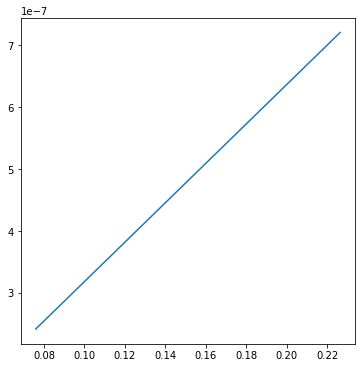

In [9]:
#plotting height increments against the produced moments

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(HEIGHTINC, moments)
plt.show()

In [ ]:
#looking at radius increments

moments2 = []
for i in range(len(OUTERRADINC)):
    #wedge(mass, r1, r2, thickness, half angle, nxy, nz)
    #combines two semicircles into one mass object, semicircles at +- OUTER_RAD/2
    wedge = gshp.wedge(CIRCLEINC[i], INNERRADINC[i], OUTERRADINC[i], HEIGHT, np.pi/2, N, 1)
    wedge1shifted = glb.translate_point_array(wedge, [0, 0, -HEIGHT/2])
    wedge2shifted = rotate_trans(wedge, np.pi, [0, 0, HEIGHT/2])
    wedgescombined = np.concatenate([wedge1shifted, wedge2shifted])

    #combines two edges connecting semicircles into one mass object
    beam = gshp.wedge(MASS_BEAM, INNERRADINC[i], OUTERRADINC[i], HEIGHT, BEAM_THICK, 1, N)
    beam1shifted = rotate_trans(beam, np.pi/2, [0, 0, 0])
    beam2shifted = rotate_trans(beam, 3*np.pi/2, [0, 0, 0])
    beamscombined = np.concatenate([beam1shifted, beam2shifted])

    #fig, ax = glb.display_points(wedgescombined, beamscombined)
    #ax.set_zlim([-.17, .17])

    #calculating moments
    totalmass = np.concatenate([wedgescombined, beamscombined])
    moments2.append(p2m.qmoment(2, 1, totalmass))
    
    #printing produces a lot of stuff
    #print(moments2[i])

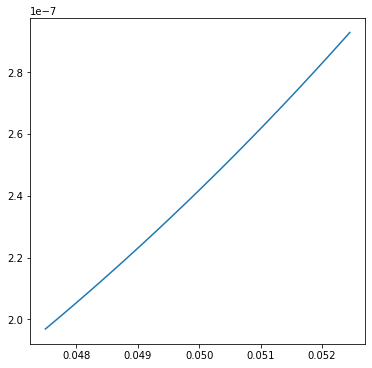

In [100]:
#looking at radius increments vs moments

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(OUTERRADINC, moments2)
plt.show()

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#TAKES A LONG TIME TO RUN, DON'T ACCIDENTALLY RUN
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#looking at both height and radius increments
momentinc = []
momentcompinc = []
for i in range(len(OUTERRADINC)):
    momentplace = []
    momentcompplace = []
    for j in range(len(HEIGHTINC)):
        #wedge(mass, r1, r2, thickness, half angle, nxy, nz)
        #combines two semicircles into one mass object, semicircles at +- OUTER_RAD/2
        wedge = gshp.wedge(CIRCLEINC[i], INNERRADINC[i], OUTERRADINC[i], HEIGHTINC[j], np.pi/2, N, 1)
        wedge1shifted = glb.translate_point_array(wedge, [0, 0, -HEIGHTINC[j]/2])
        wedge2shifted = rotate_trans(wedge, np.pi, [0, 0, HEIGHTINC[j]/2])
        wedgescombined = np.concatenate([wedge1shifted, wedge2shifted])

        #combines two edges connecting semicircles into one mass object
        beam = gshp.wedge(MASS_BEAM, INNERRADINC[i], OUTERRADINC[i], HEIGHTINC[j], BEAM_THICK, 1, N)
        beam1shifted = rotate_trans(beam, np.pi/2, [0, 0, 0])
        beam2shifted = rotate_trans(beam, 3*np.pi/2, [0, 0, 0])
        beamscombined = np.concatenate([beam1shifted, beam2shifted])

        #fig, ax = glb.display_points(wedgescombined, beamscombined)
        #ax.set_zlim([-.17, .17])

        #calculating moments
        totalmass = np.concatenate([wedgescombined, beamscombined])
        momentplace.append(p2m.qmoment(2, 1, totalmass))
        momentcompplace.append(p2m.qmoments(2, totalmass))
        
        #printing will cause the output to be massive
        print(momentplace[j])
        
    momentinc.append(momentplace)
    momentcompinc.append(momentcompplace)

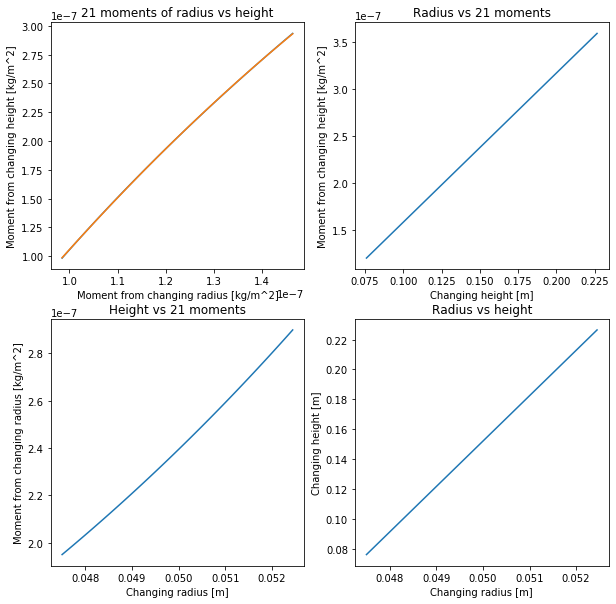

[-1.25763254e+07+2.78524356e-08j  7.13450217e+00-7.50768281e-15j
 -4.81777060e-07+4.50905137e-22j]


In [188]:
#looking at relation between varying height and radius for moments

momentarr = np.array(momentinc) #[j, :] is for changing height with rad j, [:, i] is for changing radius with height i 

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(momentarr[:, 0], momentarr[0, :]) #plot of moment from changing radius vs moment from changing height
axs[0, 0].set_title("21 moments of radius vs height")
axs[0, 0].set_xlabel('Moment from changing radius [kg/m^2]')
axs[0, 0].set_ylabel('Moment from changing height [kg/m^2]')
axs[0, 1].plot(HEIGHTINC, momentarr[49, :]) #height changing plot
axs[0, 1].set_title("Radius vs 21 moments")
axs[0, 1].set_xlabel('Changing height [m]')
axs[0, 1].set_ylabel('Moment from changing height [kg/m^2]')
axs[1, 0].plot(OUTERRADINC, momentarr[:, 49]) #radius changing plot
axs[1, 0].set_title("Height vs 21 moments")
axs[1, 0].set_xlabel('Changing radius [m]')
axs[1, 0].set_ylabel('Moment from changing radius [kg/m^2]')
axs[1, 1].plot(OUTERRADINC, HEIGHTINC) #checking radius vs height
axs[1, 1].set_title("Radius vs height")
axs[1, 1].set_xlabel('Changing radius [m]')
axs[1, 1].set_ylabel('Changing height [m]')

slope = np.polyfit(momentarr[:, 0], momentarr[0, :], 2)
X_ = np.linspace(momentarr[:, 0].min(), momentarr[:, 0].max(), 500)
axs[0, 0].plot(X_, slope[0]*X_**2 + slope[1]*X_+slope[2])
plt.show()
print(slope)

In [172]:
#momentcompinc[1][1][2][3] #momentcompinc[rad][height][2 = 2nd moment][2 = 20, 3 = 21, 4 = 22]

#defines lists for the moments of 20, 21, and 22; can be used in same way as momentinc was in previous cell
momentcomp20 = [[momentcompinc[j][i][2][2] for i in range(ran)] for j in range(ran)]
momentcomp21 = [[momentcompinc[j][i][2][3] for i in range(ran)] for j in range(ran)]
momentcomp22 = [[momentcompinc[j][i][2][4] for i in range(ran)] for j in range(ran)]

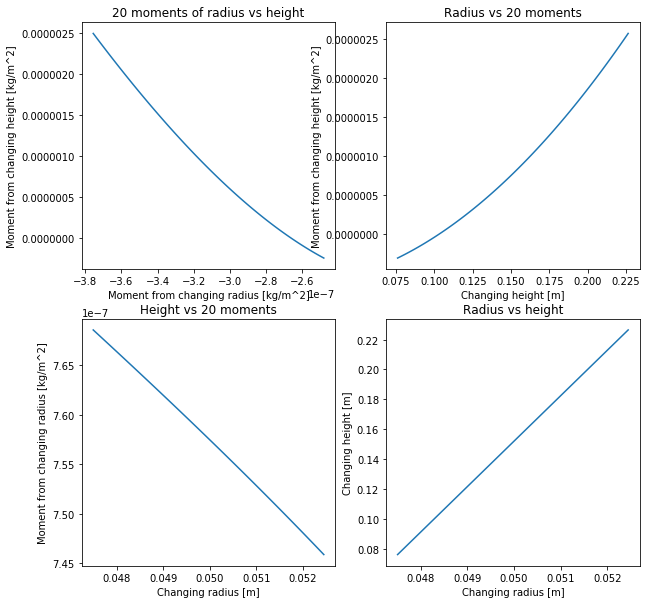

In [190]:
#looking at relation between varying height and radius for 20 moments

moment20arr = np.array(momentcomp20) #[j, :] is for changing height with rad j, [:, i] is for changing radius with height i 

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(moment20arr[:, 0], moment20arr[0, :]) #plot of moment from changing radius vs moment from changing height
axs[0, 0].set_title("20 moments of radius vs height")
axs[0, 0].set_xlabel('Moment from changing radius [kg/m^2]')
axs[0, 0].set_ylabel('Moment from changing height [kg/m^2]')
axs[0, 1].plot(HEIGHTINC, moment20arr[49, :]) #height changing plot
axs[0, 1].set_title("Radius vs 20 moments")
axs[0, 1].set_xlabel('Changing height [m]')
axs[0, 1].set_ylabel('Moment from changing height [kg/m^2]')
axs[1, 0].plot(OUTERRADINC, moment20arr[:, 49]) #radius changing plot
axs[1, 0].set_title("Height vs 20 moments")
axs[1, 0].set_xlabel('Changing radius [m]')
axs[1, 0].set_ylabel('Moment from changing radius [kg/m^2]')
axs[1, 1].plot(OUTERRADINC, HEIGHTINC) #checking radius vs height
axs[1, 1].set_title("Radius vs height")
axs[1, 1].set_xlabel('Changing radius [m]')
axs[1, 1].set_ylabel('Changing height [m]')

plt.show()

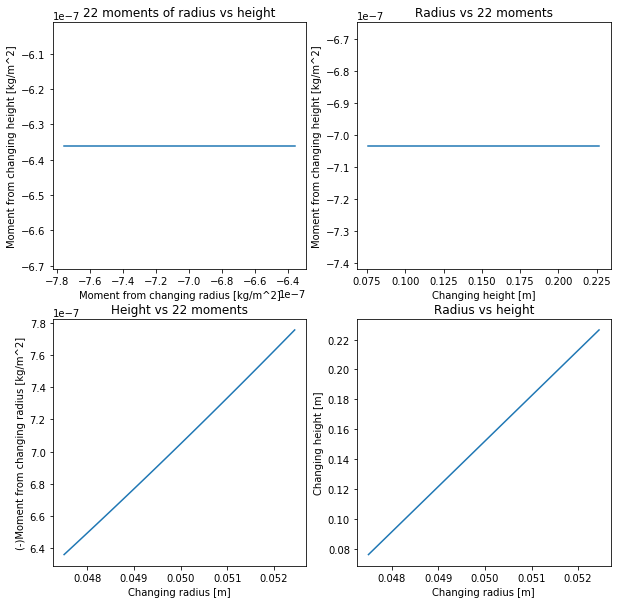

In [193]:
#looking at relation between varying height and radius for 20 moments

moment22arr = np.array(momentcomp22) #[j, :] is for changing height with rad j, [:, i] is for changing radius with height i 

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(moment22arr[:, 0], moment22arr[0, :]) #plot of moment from changing radius vs moment from changing height
axs[0, 0].set_title("22 moments of radius vs height")
axs[0, 0].set_xlabel('Moment from changing radius [kg/m^2]')
axs[0, 0].set_ylabel('Moment from changing height [kg/m^2]')
axs[0, 1].plot(HEIGHTINC, moment22arr[49, :]) #height changing plot
axs[0, 1].set_title("Radius vs 22 moments")
axs[0, 1].set_xlabel('Changing height [m]')
axs[0, 1].set_ylabel('Moment from changing height [kg/m^2]')
axs[1, 0].plot(OUTERRADINC, -1*moment22arr[:, 49]) #radius changing plot
axs[1, 0].set_title("Height vs 22 moments")
axs[1, 0].set_xlabel('Changing radius [m]')
axs[1, 0].set_ylabel('(-)Moment from changing radius [kg/m^2]')
axs[1, 1].plot(OUTERRADINC, HEIGHTINC) #checking radius vs height
axs[1, 1].set_title("Radius vs height")
axs[1, 1].set_xlabel('Changing radius [m]')
axs[1, 1].set_ylabel('Changing height [m]')

plt.show()

(2.8382967906053847e-15-15.450968080927593j)


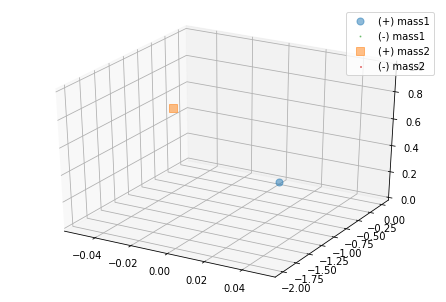

In [98]:
#looking at the multipole between two points -- should be simple to make conclusions from

#rectangle(mass, x, y, z, nx, ny, nz):
p1 = gshp.rectangle(10, 0, 0, 0, 1, 1, 1)
p2 = rotate_trans(p1, 0, [0, -2, 1])
fig, ax = glb.display_points(p1, p2)
ax.set_zlim([0, 1])
totalmass = np.concatenate([p1, p2])
print(p2m.qmoment(2, 1, totalmass))

(1.419211475460852e-09-7725827.432850911j)


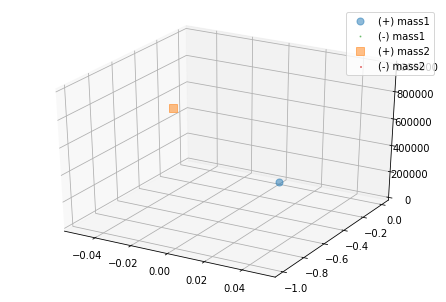

In [99]:
#increasing the height of the second point by a LOT

p1 = gshp.rectangle(10, 0, 0, 0, 1, 1, 1)
p2 = rotate_trans(p1, 0, [0, -1, 1000000])
fig, ax = glb.display_points(p1, p2)
ax.set_zlim([0, 1000000])
totalmass = np.concatenate([p1, p2])
print(p2m.qmoment(2, 1, totalmass))